In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt
from mintpy.utils import readfile, writefile, utils as ut
plt.rcParams.update({'font.size': 12})

In [2]:
def los_file2enu_file(los_name, los_file, enu_file, update_mode=True):
    if update_mode and os.path.isfile(enu_file):
        print(f'ENU file ({enu_file}) exists, skip re-generating.')
        # plot
        ve = readfile.read(enu_file, datasetName='band1')[0]
        vn = readfile.read(enu_file, datasetName='band2')[0]
        vu = readfile.read(enu_file, datasetName='band3')[0]
        plot_enu_vectors(ve, vn, vu)
        return

    # read
    atr = readfile.read_attribute(los_file)
    length, width = int(atr['LENGTH']), int(atr['WIDTH'])
    
    # along-track direction: positive for moving toward the flight direction
    ve = np.zeros((length, width), dtype=np.float32)
    vn = np.ones((length, width), dtype=np.float32)*(-1)  ######降轨
    vu = np.zeros((length, width), dtype=np.float32)

    # plot
    plot_enu_vectors(ve, vn, vu)

    # write
    data = np.hstack((ve, vn, vu), dtype=np.float32)
    print(f'write file: {enu_file}')
    data.tofile(enu_file)
    atr['FILE_TYPE'] = 'unit_vector'
    atr['BANDS'] = '3'
    atr['INTERLEAVE'] = 'BIL'
    atr['DATA_TYPE'] = 'float32'
    writefile.write_isce_xml(atr, enu_file)
    writefile.write_roipac_rsc(atr, enu_file+'.rsc')
    return enu_file


def plot_enu_vectors(ve, vn, vu):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[15, 5], sharey=True)
    for ax, data, title in zip(axs, [ve, vn, vu], ['east', 'north', 'up']):
        im = ax.imshow(data, interpolation='nearest')
        ax.set_title(title)
        fig.colorbar(im, ax=ax, orientation='horizontal')
    plt.show()
    return


print('wram up functions.')

wram up functions.


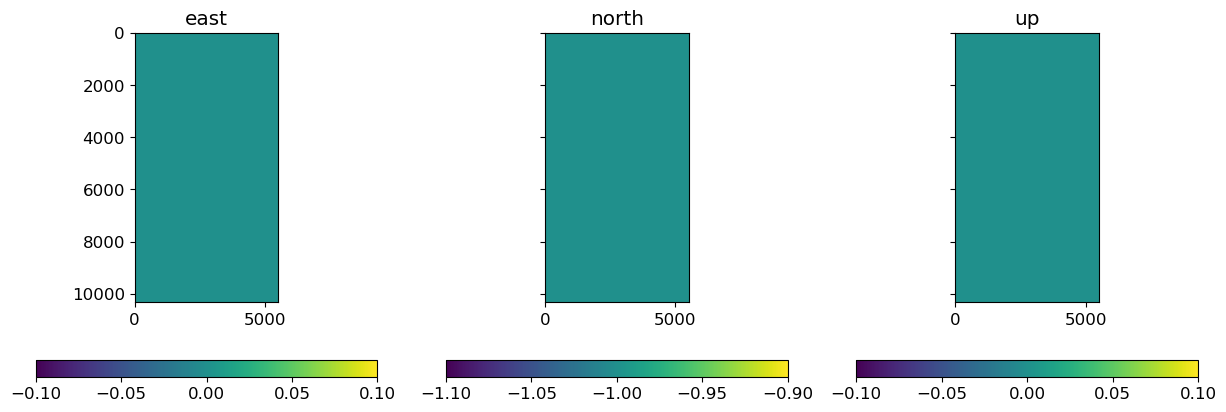

write file: /home/eedy/penguin/25EQ_myanmar/s1_3D_result/data/s2_20250327_20250401_NS/enu.geo
write file: /home/eedy/penguin/25EQ_myanmar/s1_3D_result/data/s2_20250327_20250401_NS/enu.geo.xml
write file: /home/eedy/penguin/25EQ_myanmar/s1_3D_result/data/s2_20250327_20250401_NS/enu.geo.vrt


'/home/eedy/penguin/25EQ_myanmar/s1_3D_result/data/s2_20250327_20250401_NS/enu.geo'

In [3]:
los_name = f'/home/eedy/penguin/25EQ_myanmar/s1_3D_result/data/s2_20250327_20250401_NS/off_deramped.tif'
los_file = f'/home/eedy/penguin/25EQ_myanmar/s1_3D_result/data/s2_20250327_20250401_NS/off_deramped.tif'
enu_file = f'/home/eedy/penguin/25EQ_myanmar/s1_3D_result/data/s2_20250327_20250401_NS/enu.geo'

update_mode = True
los_file2enu_file(los_name, los_file, enu_file, update_mode=update_mode)